In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
import scipy.stats as sc
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [1]:
boostap = np.load('../data/boost.npy')
boostsnr = np.load('../data/boost_snr.npy')
cosine_matrix = np.load('../data/cosine_mat.npy')
dendrodist = np.load('../data/dendrodist.npy')
axe_cosine_matrix = np.load('../data/axe_cosine_matrix.npy')
snr_full = np.load('../data/snr_full.npy') #[marge,bruit,snr]
snr_baseline_full = np.load('../data/snr_baseline_full.npy')

NameError: name 'np' is not defined

In [4]:
all_info = np.concatenate((np.expand_dims(boostap,-1), snr_full, dendrodist, cosine_matrix,np.expand_dims(axe_cosine_matrix,-1) ), axis = -1)
np.save('boost_and_dist.npy', all_info)

Text(0, 0.5, 'Gain RSB')

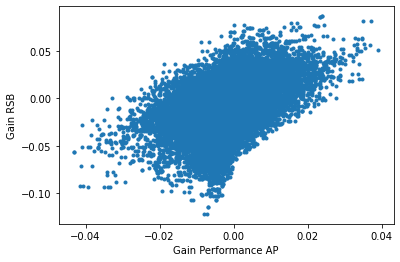

In [5]:
plt.scatter(boostap.ravel(), boostsnr.ravel(), marker = '.')
plt.xlabel('Gain Performance AP')
plt.ylabel('Gain RSB')

In [6]:
slope, intercept, r_value, p_value, std_err = sc.linregress(boostap.ravel(), boostsnr.ravel())

In [7]:
slope,r_value,p_value

(1.5083660120601516, 0.4741432282922111, 0.0)

ok


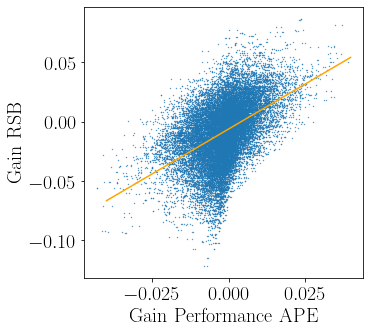

In [8]:
plt.figure(figsize=(5,5))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})
plt.scatter(boostap.ravel(), boostsnr.ravel(), marker = '.',s=0.5)
x=0.04
plt.plot([-x,x],[-x*slope+intercept,x*slope+intercept], c= 'orange')
plt.xlabel('Gain Performance APE')
plt.ylabel('Gain RSB')
print('ok')
plt.savefig('RSBvsAP.pdf',bbox_inches='tight')

In [11]:
marge = snr_full[:,:,:,0]
bruit = snr_full[:,:,:,1]

Text(0, 0.5, 'marge')

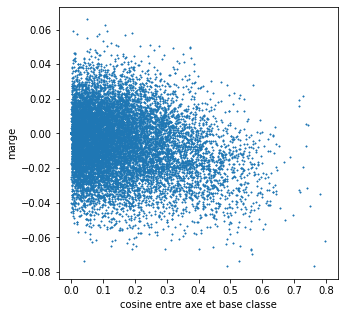

In [15]:
plt.figure(figsize = (5,5))
plt.scatter(abs(axe_cosine_matrix.ravel()),marge.ravel(), s = 0.5,label =  'marge') 
plt.xlabel('cosine entre axe et base classe')
plt.ylabel('marge')

Text(0, 0.5, 'bruit')

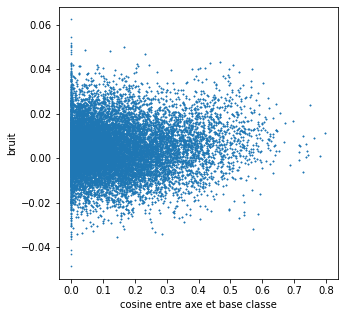

In [16]:
plt.figure(figsize = (5,5))
#plt.scatter(abs(axe_cosine_matrix.ravel()),marge.ravel(), s = 0.2,label =  'marge') 
plt.scatter(abs(axe_cosine_matrix.ravel()),bruit.ravel(), s=0.5,label =  'bruit') 
plt.xlabel('cosine entre axe et base classe')
plt.ylabel('bruit')

In [20]:
axcos_r = abs(axe_cosine_matrix.ravel())
marg_r = marge.ravel()
brui_r = bruit.ravel()

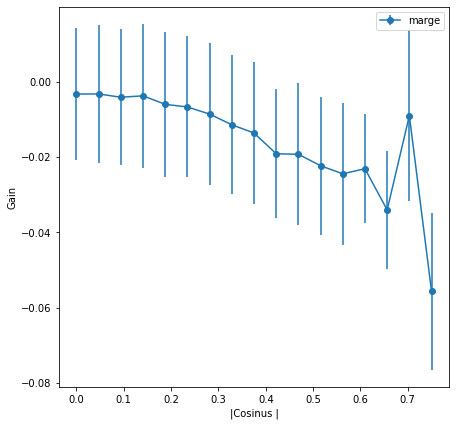

In [81]:
Lmar,Lbrui = [],[]
Lmar_sig, Lbrui_sig=[],[]
bins = 18

xspace = np.linspace(axcos_r.min(),axcos_r.max(),bins)
Lsamp=[]
for i in range(bins-1):
    idx = (axcos_r>xspace[i]) * (axcos_r<xspace[i+1])
    #print(idx.sum(), marg_r[idx].mean())
    Lmar.append(marg_r[idx].mean())
    Lbrui.append(brui_r[idx].mean())
    Lmar_sig.append(marg_r[idx].std())#1.96/np.sqrt(idx.sum()))
    Lbrui_sig.append(brui_r[idx].std())#*1.96/np.sqrt(idx.sum()))
    Lsamp.append(idx.sum())
plt.figure(figsize=(7,7))
plt.errorbar(x=xspace[:-1], y=Lmar,yerr=Lmar_sig ,label = 'marge',marker = 'o')
#plt.errorbar(x=xspace[:-1], y=Lbrui ,yerr=Lbrui_sig, label = 'bruit',marker = 'o')
#plt.plot(xspace[:-1],np.log(Lsamp)/200, label = 'log (nb sample)/200',marker = 'o')
plt.legend()
plt.xlabel("|Cosinus |")
plt.ylabel('Gain')
tikzplotlib.save('gain_vs_cos.tikz')

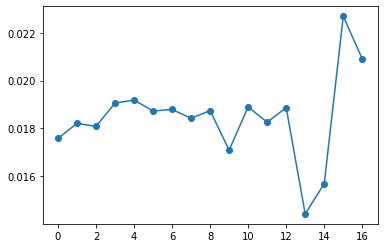

In [82]:
plt.plot(Lmar_sig,'-o')

In [116]:
axcos_r_nz = axcos_r[axcos_r!=0]

In [86]:
def binning(x,bins):
    nb_sample = x.shape[0]//bins
    idx = x.argsort()
    l=list()
    for i in range(bins):
        l.append(idx[i*nb_sample:(i+1)*nb_sample])
    return np.array(l), nb_sample

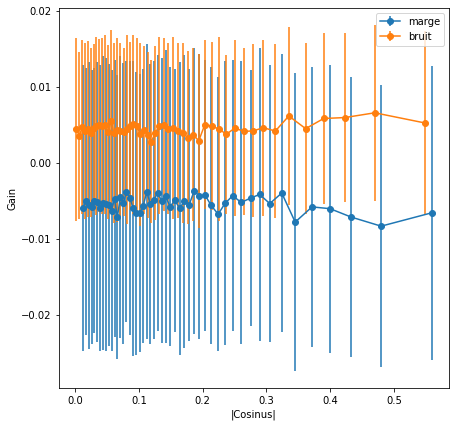

In [121]:
bins= 50
binnin,nb_sampl = binning(axcos_r_nz,bins)
Lmar,Lbrui = [],[]
Lmar_sig, Lbrui_sig=[],[]
Lsamp=[]

xspace = axcos_r_nz[binnin[:,nb_sampl//2]]

for i in range(bins):
    #print(idx.sum(), marg_r[idx].mean())
    idx = binnin[i]
    Lmar.append(marg_r[idx].mean())
    Lbrui.append(brui_r[idx].mean())
    Lmar_sig.append(marg_r[idx].std())#1.96/np.sqrt(idx.sum()))
    Lbrui_sig.append(brui_r[idx].std())#*1.96/np.sqrt(idx.sum()))
    Lsamp.append(idx.sum())
plt.figure(figsize=(7,7))
plt.errorbar(x=xspace+0.01, y=Lmar,yerr=Lmar_sig ,label = 'marge',marker = 'o')
plt.errorbar(x=xspace, y=Lbrui ,yerr=Lbrui_sig, label = 'bruit',marker = 'o')
#plt.plot(xspace,np.log(Lsamp)/200, label = 'log (nb sample)/200',marker = 'o')
plt.legend()
plt.xlabel("|Cosinus|")
plt.ylabel('Gain')
tikzplotlib.save('gain_vs_cos.tikz')

Text(0, 0.5, 'ecart type marge')

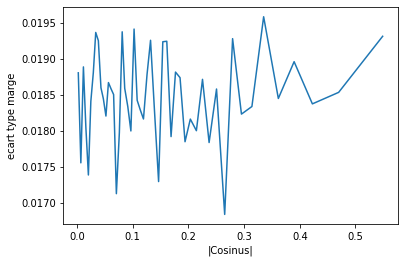

In [122]:
plt.plot(xspace[0:],Lmar_sig[0:])
plt.xlabel('|Cosinus|')
plt.ylabel('ecart type marge')

In [123]:
marge_baseline = snr_baseline_full[:,:,0]
bruit_baseline = snr_baseline_full[:,:,1]

In [124]:
marg_r_p = (marge/marge_baseline).ravel()
brui_r_p = (bruit/marge_baseline).ravel()

/tmp/ipykernel_78121/319844004.py:1: RuntimeWarning: invalid value encountered in true_divide
  marg_r_p = (marge/marge_baseline).ravel()
/tmp/ipykernel_78121/319844004.py:2: RuntimeWarning: divide by zero encountered in true_divide
  brui_r_p = (bruit/marge_baseline).ravel()


KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 5120  5121  5122 ... 25597 25598 25599] TEST: [   0    1    2 ... 5117 5118 5119]
4.2725236633887644e-05
TRAIN: [    0     1     2 ... 25597 25598 25599] TEST: [ 5120  5121  5122 ... 10237 10238 10239]
4.3984504214629756e-05
TRAIN: [    0     1     2 ... 25597 25598 25599] TEST: [10240 10241 10242 ... 15357 15358 15359]
4.676938142650951e-05
TRAIN: [    0     1     2 ... 25597 25598 25599] TEST: [15360 15361 15362 ... 20477 20478 20479]
4.954125335194777e-05
TRAIN: [    0     1     2 ... 20477 20478 20479] TEST: [20480 20481 20482 ... 25597 25598 25599]
4.405326394677306e-05


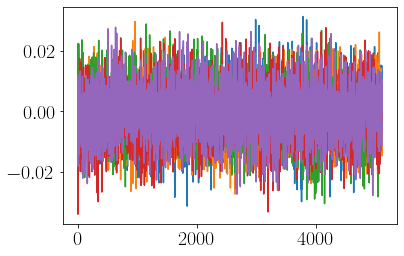

In [65]:
y = all_info[:,:,:,0].ravel()  #performance AP
X = all_info[:,:,:,1:].reshape(-1,all_info.shape[3]-1)   #performance 
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    print(mean_squared_error(y_test, reg.predict(X_test)))
    plt.plot(y_test-reg.predict(X_test))

In [70]:
seuil = 0.01
id_pred = reg.predict(X)>seuil
id_true = y>seuil
print(id_pred.sum(), id_true.sum(), (id_pred*id_true).sum()/id_pred.sum())

248 1769 0.657258064516129


KFold(n_splits=5, random_state=None, shuffle=False)


Text(0, 0.5, 'MSE')

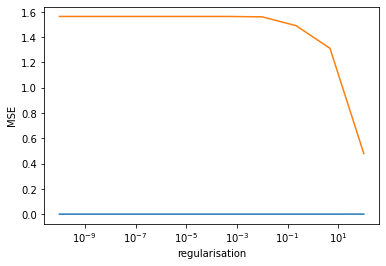

In [183]:
y = all_info[:,:,:,0].ravel()  #performance AP
X = all_info[:,:,:,1:].reshape(-1,all_info.shape[3]-1)   #performance 
n_split = 5
kf = KFold(n_splits=n_split)
kf.get_n_splits(X)

print(kf)
L = []
lscore=[]
list_alpha = np.logspace(-10,2,10)
for alpha in list_alpha:
    moy=0
    moyscore = 0
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        reg = Ridge(alpha=alpha).fit(X_train, y_train)
        moy+= mean_squared_error(y_test, reg.predict(X_test))
        moyscore+=reg.score(X_test,y_test)
    L.append(moy)
    lscore.append(moyscore)
    
plt.plot(list_alpha,L)
plt.plot(list_alpha,lscore)
plt.xscale('log')
plt.xlabel('regularisation')
plt.ylabel('MSE')

In [107]:
alpha = 1e-10
reg = Ridge(alpha=alpha).fit(X, y)
seuil = 0.015
id_pred = reg.predict(X)>seuil
id_true = y>seuil
print(id_pred.sum(),'boosts de plus de', seuil*100,"% trouvés. C'est", id_pred.sum()/id_true.sum()*100,"% des boosts de ce niveau et ", (id_pred*id_true).sum()/id_pred.sum(), "% des booststs trouvés sont vraiment des boosts de ce niveau.")

17 boosts de plus de 1.5 % trouvés. C'est 2.4637681159420293 % des boosts de ce niveau et  0.8823529411764706 % des booststs trouvés sont vraiment des boosts de ce niveau.


In [187]:
moy=0
moyscore = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    moy+= mean_squared_error(y_test, reg.predict(X_test))/n_split
    moyscore+=reg.score(X_test,y_test)/n_split
print(np.sqrt(moy),moyscore)

0.006739045029879942 0.31288658842173256


In [188]:
moy=0
moyscore = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
    moy+= mean_squared_error(y_test, reg.predict(X_test))/n_split
    moyscore+=reg.score(X_test,y_test)/n_split
print(np.sqrt(moy),moyscore)

0.0048479511074872575 0.6440203758861888


In [190]:
moy=0
moyscore = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = RandomForestRegressor().fit(X_train, y_train)
    moy+= mean_squared_error(y_test, reg.predict(X_test))/n_split
    moyscore+=reg.score(X_test,y_test)/n_split
print(np.sqrt(moy),moyscore)

0.0036653682259654478 0.7970692681938125


In [191]:
reg = RandomForestRegressor().fit(X_train, y_train)
seuil = 0.015
id_pred = reg.predict(X_test)>seuil
id_true = y_test>seuil
print(id_pred.sum(),'boosts de plus de', seuil*100,"% trouvés. C'est", id_pred.sum()/id_true.sum()*100,"% des boosts de ce niveau et ", (id_pred*id_true).sum()/id_pred.sum()*100, "% des booststs trouvés sont vraiment des boosts de ce niveau.")

137 boosts de plus de 1.5 % trouvés. C'est 97.85714285714285 % des boosts de ce niveau et  67.88321167883211 % des booststs trouvés sont vraiment des boosts de ce niveau.


Text(0.5, 0, 'real boost')

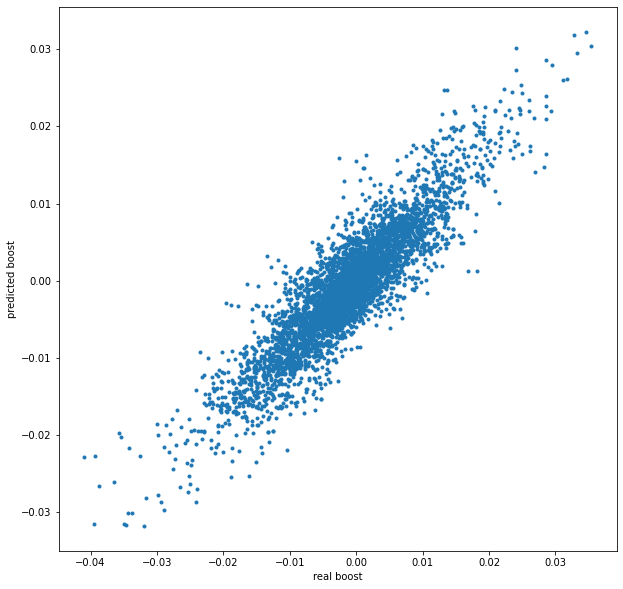

In [192]:
plt.figure(figsize=(10,10))
plt.plot(y_test, reg.predict(X_test),'.')
plt.ylabel('predicted boost')
plt.xlabel('real boost')

In [193]:
no_dblon = []
for k in range(64):
    for i in range(20):
        for j in range(i):
            no_dblon.append(all_info[k,i,j])
no_dblon= np.array(no_dblon)

In [194]:
no_dblon.shape

(12160, 11)

In [195]:
idperm = np.random.permutation(20)
all_info_1 = all_info[:,idperm[:10]][:,:,idperm[:10]]
all_info_2 = all_info[:,idperm[10:]][:,:,idperm[10:]]

In [196]:
all_info_2.shape

(64, 10, 10, 11)

In [197]:
no_dblon1 = []
no_dblon2 = []
for k in range(64):
    for i in range(10):
        for j in range(i):
            no_dblon1.append(all_info_1[k,i,j])
            no_dblon2.append(all_info_2[k,i,j])

no_dblon1= np.array(no_dblon1)
no_dblon2= np.array(no_dblon2)

In [199]:
X,y = no_dblon1[:,1:], no_dblon1[:,0]
n_split=5
kf = KFold(n_splits=n_split)
kf.get_n_splits(X)
moy=0
moyscore = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = RandomForestRegressor().fit(X_train, y_train)
    moy+= mean_squared_error(y_test, reg.predict(X_test))/n_split
    moyscore+=reg.score(X_test,y_test)/n_split
print(np.sqrt(moy),moyscore)

0.004120803687385273 0.7947340455505754


Text(0.5, 0, 'real boost')

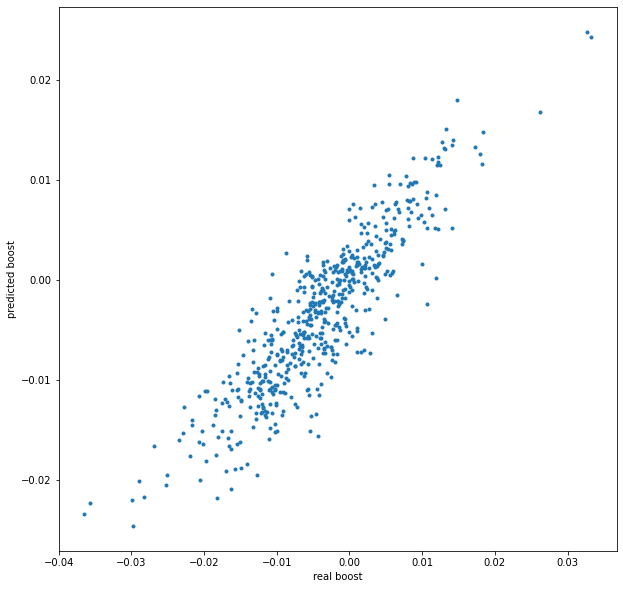

In [200]:
plt.figure(figsize=(10,10))
plt.plot(y_test, reg.predict(X_test),'.')
plt.ylabel('predicted boost')
plt.xlabel('real boost')

In [201]:
# snr_full, dendrodist (1,2,3), cosine_matrix,np.expand_dims(axe_cosine_matrix,-1) ), axis = -1)
reg.feature_importances_

array([0.15314524, 0.03932959, 0.22146666, 0.10742881, 0.01254897,
       0.00832356, 0.37922916, 0.0268118 , 0.02624578, 0.02547043])

In [202]:

reg = RandomForestRegressor().fit(no_dblon1[:,id_info :], no_dblon1[:,0])

0.9752383881487059
-0.451802873188911


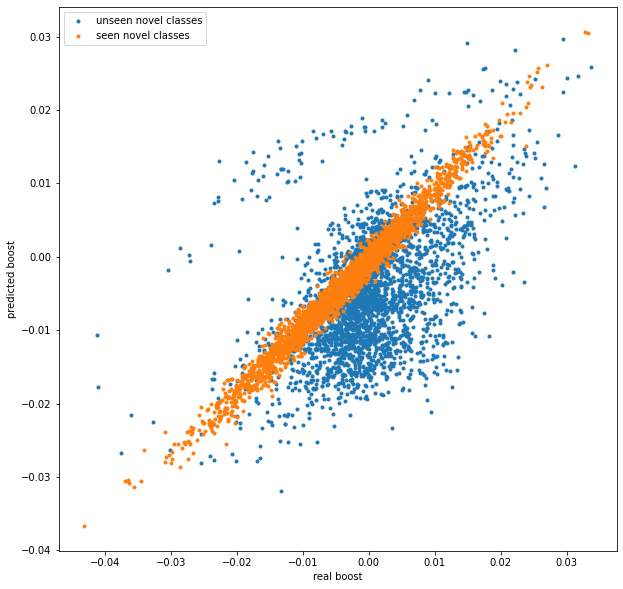

In [214]:
id_info = 1
plt.figure(figsize=(10,10))
reg = RandomForestRegressor().fit(no_dblon1[:,id_info :], no_dblon1[:,0])
plt.plot(no_dblon2[:,0], reg.predict(no_dblon2[:,id_info :]),'.',label='unseen novel classes')
plt.plot(no_dblon1[:,0], reg.predict(no_dblon1[:,id_info :]),'.',label='seen novel classes')
print(reg.score(no_dblon1[:,id_info :],no_dblon1[:,0]))
print(reg.score(no_dblon2[:,id_info :],no_dblon2[:,0]))
plt.ylabel('predicted boost')
plt.xlabel('real boost')
plt.legend()